<hr style="border-width:2px;border-color:#3d63c4">
<h1 style = "text-align:center" > 2. Projet Satisfaction clients - Dataviz </h1>
<hr style="border-width:2px;border-color:#3d63c4">

In [12]:
#importation des librairies et du dataframe
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_pickle("C:\\Users\\younes.essoualhi\\Documents\\Projet prédiction note\\df2.pkl")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19039 entries, 0 to 19862
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   Commentaire    19039 non-null  object             
 1   star           19039 non-null  int64              
 2   date           19039 non-null  datetime64[ns, UTC]
 3   client         9778 non-null   object             
 4   reponse        8296 non-null   object             
 5   source         19039 non-null  object             
 6   company        19039 non-null  object             
 7   ville          4729 non-null   object             
 8   date_commande  6683 non-null   datetime64[ns, UTC]
 9   ecart          6683 non-null   float64            
dtypes: datetime64[ns, UTC](2), float64(1), int64(1), object(6)
memory usage: 1.6+ MB


In [5]:
df.head(5)

,Commentaire,star,date,client,reponse,source,company,ville,date_commande,ecart
0,bonjour ca ans membre showrooprive jamais souc...,1,2021-06-20 00:00:00+00:00,AUDREY Du 62,NaN,TrustPilot,ShowRoom,NaN,NaT,NaN
1,vente lacoste article manquant photo prise art...,1,2021-06-20 00:00:00+00:00,Nanasky De Verteuil,NaN,TrustPilot,ShowRoom,NaN,NaT,NaN
2,vente lacoste honteuse article erroné article ...,1,2021-06-19 00:00:00+00:00,Vanessa L,NaN,TrustPilot,ShowRoom,NaN,NaT,NaN
3,commandé mules marque moosefield déçue produit...,2,2021-06-19 00:00:00+00:00,Valery PERRAULT,"Bonjour , Je suis sincèrement navré d'apprendr...",TrustPilot,ShowRoom,NaN,NaT,NaN
4,commande téléphone etat livraison vieux téléph...,1,2021-06-19 00:00:00+00:00,JULIE DRINGENBERG,"Bonjour Julie , Je suis sincèrement désolé de ...",TrustPilot,ShowRoom,NaN,NaT,NaN


### C. Distribution des données

### a.Variable date

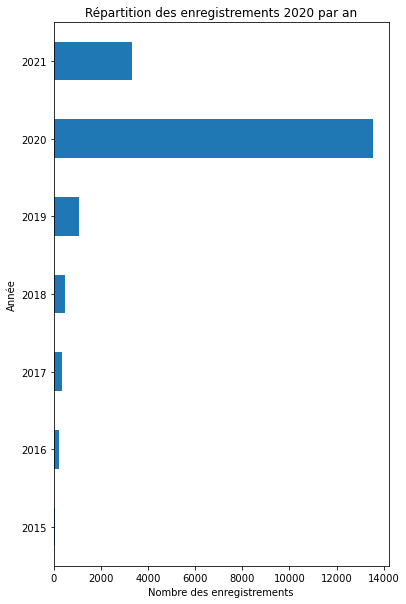

In [9]:
# graphiques en barre par an
df['Année'] = df['date'].dt.year
df1=df.groupby(['Année'])['star'].count()
df1.plot(x="Année", y="star",kind='barh', figsize=(6,10))
plt.title('Répartition des enregistrements 2020 par an')
plt.xlabel("Nombre des enregistrements")
plt.show()

> 70% des données ont été collectées en 2020.

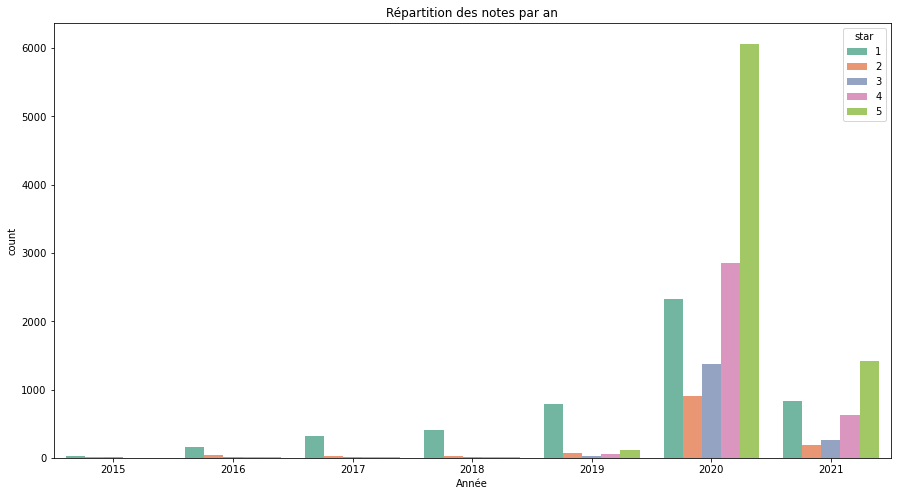

In [14]:
# graphiques en barre Répartition des notes
fig, ax = plt.subplots(figsize=(15,8))
sns.countplot(x="Année",hue="star",data=df,palette="Set2")
plt.title('Répartition des notes par an')
plt.show()

### b. Variable client

In [16]:
#les valeurs les plus fréquentes de la variable client
df['client'].value_counts(ascending=False).head(10)

Client          28
Nelly L .       28
Isabelle F .    27
Lili M .        17
Sabrina R .     17
Marie M .       17
Evelyne B .     15
Haji S .        14
SAMIRA L .      13
Helena G .      13
Name: client, dtype: int64

### c. Variable source

source
TrustPilot      5053
TrustedShop    13986
Name: star, dtype: int64


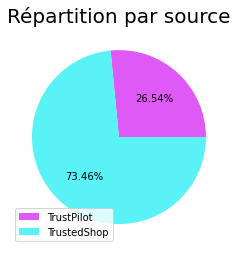

In [17]:
# répartition par source
print(df.groupby('source')['star'].count())
plt.pie(df.groupby('source')['star'].count(), colors = ['#df59f7','#59f2f7'],
                                             autopct = lambda x: str(round(x, 2)) + '%')
plt.legend(labels = ['TrustPilot', 'TrustedShop'],loc='best')
plt.title("Répartition par source",fontsize=20);

> Nous avons 3 fois plus de données issues de TrustedShop

### d. Variable company

company
ShowRoom    16178
VeePee       2861
Name: star, dtype: int64


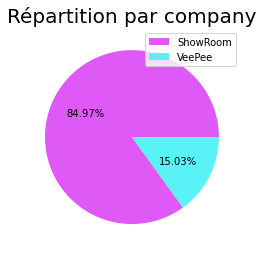

In [18]:
# répartition par company
print(df.groupby('company')['star'].count())
plt.pie(df.groupby('company')['star'].count(), colors = ['#df59f7','#59f2f7'],
                                             autopct = lambda x: str(round(x, 2)) + '%')
plt.legend(labels = ['ShowRoom', 'VeePee'],loc='best')
plt.title("Répartition par company",fontsize=20);

> Nous avons 5 fois plus de données sur ShowRoom

In [19]:
pd.crosstab(df['company'],df['source'],normalize=0)

source,TrustPilot,TrustedShop
company,,
ShowRoom,0.135493,0.864507
VeePee,1.000000,0.000000


> - les données Veepee viennent à 100% du site TrustPilot <br>
> - les données ShowRoom viennent à 87% su site TrustedShop

### e. Variable ville

In [20]:
#les valeurs les plus fréquentes de la variable ville
df['ville'].value_counts(ascending=False).head(20)

Paris                 105
Lyon                   42
Marseille              35
BRIVE LA GAILLARDE     31
Strasbourg             29
Chatenay Malabry       28
Toulouse               28
Nice                   27
Bor                    24
PARIS                  21
Lisboa                 19
Porto                  19
XXX                    17
MARSEILLE              17
Clermont               16
St Leu                 16
Caen                   16
Portugal               15
Lille                  14
Liège                  14
Name: ville, dtype: int64

In [21]:
# La variable ville contient 75% de Nan. Je ne la conserve pas pour la suite de l'analyse
df=df.drop("ville",axis = 1)

### f. Variables date_commande

In [22]:
# Croisement variables 'date_commande' et variable 'source'
pd.crosstab(df['date_commande'],df['source'],normalize=0)

source,TrustedShop
date_commande,
2020-03-13 00:00:00+00:00,1.0
2020-04-04 00:00:00+00:00,1.0
2020-05-06 00:00:00+00:00,1.0
2020-05-09 00:00:00+00:00,1.0
2020-05-10 00:00:00+00:00,1.0
...,...
2021-05-26 00:00:00+00:00,1.0
2021-05-27 00:00:00+00:00,1.0
2021-05-28 00:00:00+00:00,1.0


### g. Variable star

In [23]:
#les modalités de la variable star
df['star'].value_counts(ascending=False)

5    7652
1    4860
4    3572
3    1694
2    1261
Name: star, dtype: int64

In [24]:
# Note obtenu en fonction de la source
df1=pd.crosstab(df['star'],df['source'],normalize=1)
df1

source,TrustPilot,TrustedShop
star,,
1,0.830794,0.047333
2,0.070057,0.064851
3,0.020186,0.113828
4,0.028894,0.244959
5,0.050069,0.529029


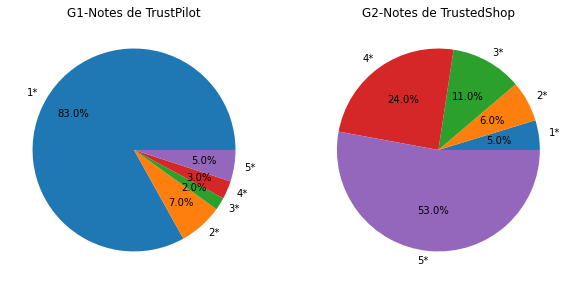

In [25]:
figure, axes = plt.subplots(1, 2, figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('G1-Notes de TrustPilot');
plt.pie(x=df1["TrustPilot"],labels=["1*","2*","3*","4*","5*"],autopct = lambda x:str(round(x,0))+'%',pctdistance=0.7);
plt.subplot(1, 2, 2)
plt.title('G2-Notes de TrustedShop');
plt.pie(x=df1["TrustedShop"],labels=["1*","2*","3*","4*","5*"],autopct = lambda x:str(round(x,0))+'%');

In [26]:
df2=pd.DataFrame(pd.crosstab(df['star'],df['company'],normalize=1),columns=['ShowRoom','VeePee'])
df2

,ShowRoom,VeePee
star,,
1,0.157683,0.807060
2,0.064903,0.073750
3,0.100630,0.023069
4,0.214674,0.034603
5,0.462109,0.061517


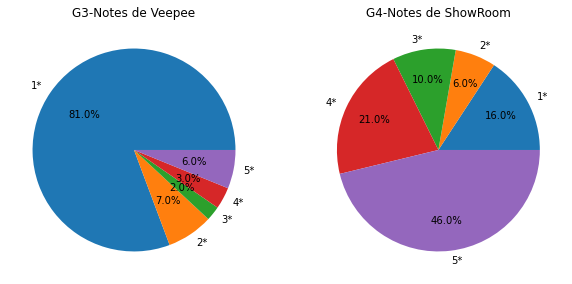

In [28]:
figure, axes = plt.subplots(1, 2, figsize=(10,5))
# Notes obtenues par chacune des entreprises
plt.subplot(1, 2, 2)
plt.title('G4-Notes de ShowRoom');
plt.pie(x=df2["ShowRoom"],labels=["1*","2*","3*","4*","5*"],autopct = lambda x:str(round(x,0))+'%',pctdistance=0.7);
plt.subplot(1, 2, 1)
plt.title('G3-Notes de Veepee');
plt.pie(x=df2["VeePee"],labels=["1*","2*","3*","4*","5*"],autopct = lambda x:str(round(x,0))+'%');

> Les notes relatives à Veepee (issues de TrustPilot) sont à 80% des notes de 1*

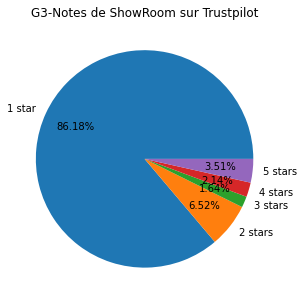

In [29]:
# vérification sur les données Showroom provenant de Trustpilot
df2=df[df['source']=="TrustPilot"]
df2=df2[df2['company']=="ShowRoom"]
plt.figure(figsize=(5, 5))
plt.title('G3-Notes de ShowRoom sur Trustpilot');
plt.pie(x=df2.groupby(['star'])['company'].count(),labels=["1 star","2 stars","3 stars","4 stars","5 stars"],autopct = lambda x:str(round(x,2))+'%',pctdistance=0.7);


> si je filtre les notes Showrroom issues de Trustpilot, on observe le même phénoméne.

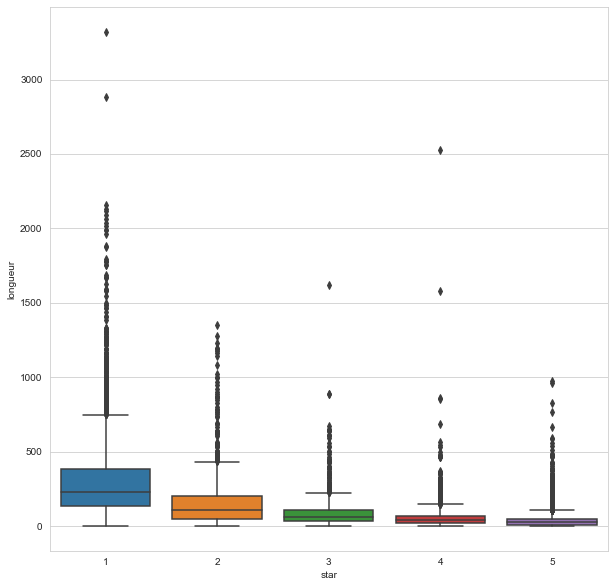

In [30]:
# longeur des commentaires en fonction de la note
df['longueur'] = df['Commentaire'].str.len()
plt.figure(figsize=(10,10))
sns.set_style("whitegrid") 
sns.boxplot(x = 'star', y = 'longueur', data = df)
plt.show()

> Il semblerait que plus l'appréciation est mauvaise (star= 1 ou 2), plus les commentaires sont longs.

In [31]:
df=df.drop(["Année","Mois","longueur","date_commande","ecart"],axis = 1)

In [32]:
df.head(5)

,Commentaire,star,date,client,reponse,source,company
0,bonjour ca ans membre showrooprive jamais souc...,1,2021-06-20 00:00:00+00:00,AUDREY Du 62,NaN,TrustPilot,ShowRoom
1,vente lacoste article manquant photo prise art...,1,2021-06-20 00:00:00+00:00,Nanasky De Verteuil,NaN,TrustPilot,ShowRoom
2,vente lacoste honteuse article erroné article ...,1,2021-06-19 00:00:00+00:00,Vanessa L,NaN,TrustPilot,ShowRoom
3,commandé mules marque moosefield déçue produit...,2,2021-06-19 00:00:00+00:00,Valery PERRAULT,"Bonjour , Je suis sincèrement navré d'apprendr...",TrustPilot,ShowRoom
4,commande téléphone etat livraison vieux téléph...,1,2021-06-19 00:00:00+00:00,JULIE DRINGENBERG,"Bonjour Julie , Je suis sincèrement désolé de ...",TrustPilot,ShowRoom


In [34]:
df.to_pickle("C:\\Users\\younes.essoualhi\\Documents\\Projet prédiction note\\df3.pkl")